In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
import io
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
filepath2 = r"C:\Users\91623\OneDrive\Desktop\projects\bike prediction\data_bike.csv"
df= pd.read_csv(filepath2)
print(df)

      Brand                      Model  Selling_Price  Year Seller_Type  \
0       TVS                 TVS XL 100          30000  2017  Individual   
1     Bajaj              Bajaj  ct 100          18000  2017  Individual   
2        Yo                   Yo Style          20000  2011  Individual   
3     Bajaj         Bajaj Discover 100          25000  2010  Individual   
4     Bajaj         Bajaj Discover 100          24999  2012  Individual   
...     ...                        ...            ...   ...         ...   
1056  Royal  Royal Enfield Electra 5 S          90000  2012  Individual   
1057   Hero            Hero Honda Hunk          20000  2010  Individual   
1058  Bajaj     Bajaj Pulsar 220 DTS-i          60000  2014  Individual   
1059   Hero     Hero Honda CBZ extreme          40000  2009  Individual   
1060   Hero     Hero Honda CBZ extreme          35000  2012  Individual   

          Owner  KM_Driven  Ex_Showroom_Price  
0     1st owner       8000            30490.0  
1  

In [3]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [5]:
df= df.dropna()

In [6]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [7]:
df.columns = df.columns.str.lower()

In [8]:
unique = [feature for feature in df.columns if len(df[feature].unique())>0 and len(df[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(df[feature].unique()),df[feature].unique(),"\n"))

brand has 18 unique values : ['TVS' 'Bajaj' 'Yo' 'Honda' 'Mahindra' 'Hero' 'Yamaha' 'Suzuki' 'Activa'
 'Vespa' 'Royal' 'Benelli' 'KTM' 'UM' 'Kawasaki' 'Hyosung' 'BMW' 'Harley'] 

selling_price has 99 unique values : [ 30000  18000  20000  25000  24999  28000  22000  24000  21000  23000
  26000  42000  32000  15000  27000  45000  70000  50000  40000  26500
  35000  34000  22989  29500  10000  16600   6000  37000  48000  16000
  17000  55000  75000  38000  58000  36000  60000  47999  65000  46000
  47000  69000  62000  12000  17500  56000  14000  51000  74000  57000
  54000  41000  76000  29900  30900  43000  80000  78000  85000  14900
  20100  72000  90000  78500  54786  87000  86000  52000  95000 105000
 100000  31000  98000 110000  77000 120000 130000 150000 145000 115000
 170000 135000 111000 140000 180000 125000 190000 165000 195000 160000
 185000 175000 200000 300000 365000 330000 425000 760000 750000] 

year has 18 unique values : [2017 2011 2010 2012 2015 2014 2009 2016 2006 2013

In [9]:
df[['brand']].value_counts()

brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
Activa        3
UM            3
Harley        2
Vespa         2
Hyosung       1
Benelli       1
BMW           1
Yo            1
dtype: int64

In [10]:
df[['owner']].value_counts()

owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [11]:
df.columns

Index(['brand', 'model', 'selling_price', 'year', 'seller_type', 'owner',
       'km_driven', 'ex_showroom_price'],
      dtype='object')

In [12]:
df.shape

(626, 8)

In [13]:
df.tail()

,brand,model,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
621,Harley,Harley-Davidson Street 750,330000,2014,Individual,4th owner,6500,534000.0
622,Kawasaki,Kawasaki Ninja 650 [2018-2019],300000,2011,Individual,1st owner,12000,589000.0
623,Kawasaki,Kawasaki Ninja 650 [2018-2019],425000,2017,Individual,2nd owner,13600,599000.0
624,Suzuki,Suzuki GSX S750,760000,2019,Individual,1st owner,2800,752020.0
625,Harley,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df1=df

In [16]:
list1=['owner','seller_type']
for i in list1:
    df1[i]=le.fit_transform(df1[i])

df1.head()

,brand,model,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,TVS,TVS XL 100,30000,2017,1,0,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,1,0,35000,32000.0
2,Yo,Yo Style,20000,2011,1,0,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,1,0,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,1,1,35000,42859.0


In [17]:
unique = [feature for feature in df1.columns if len(df1[feature].unique())>0 and len(df1[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(df1[feature].unique()),df1[feature].unique(),"\n"))

brand has 18 unique values : ['TVS' 'Bajaj' 'Yo' 'Honda' 'Mahindra' 'Hero' 'Yamaha' 'Suzuki' 'Activa'
 'Vespa' 'Royal' 'Benelli' 'KTM' 'UM' 'Kawasaki' 'Hyosung' 'BMW' 'Harley'] 

selling_price has 99 unique values : [ 30000  18000  20000  25000  24999  28000  22000  24000  21000  23000
  26000  42000  32000  15000  27000  45000  70000  50000  40000  26500
  35000  34000  22989  29500  10000  16600   6000  37000  48000  16000
  17000  55000  75000  38000  58000  36000  60000  47999  65000  46000
  47000  69000  62000  12000  17500  56000  14000  51000  74000  57000
  54000  41000  76000  29900  30900  43000  80000  78000  85000  14900
  20100  72000  90000  78500  54786  87000  86000  52000  95000 105000
 100000  31000  98000 110000  77000 120000 130000 150000 145000 115000
 170000 135000 111000 140000 180000 125000 190000 165000 195000 160000
 185000 175000 200000 300000 365000 330000 425000 760000 750000] 

year has 18 unique values : [2017 2011 2010 2012 2015 2014 2009 2016 2006 2013

<AxesSubplot:ylabel='selling_price'>

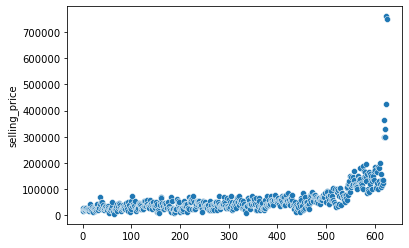

In [18]:
sns.scatterplot(data =df1['selling_price'])

In [19]:
df1 = df1.drop(df1[df1['selling_price']>300000].index)

<AxesSubplot:ylabel='selling_price'>

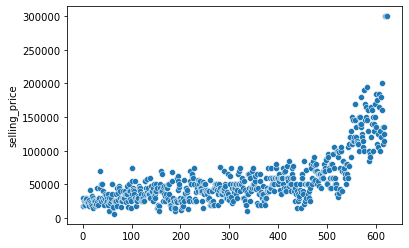

In [20]:
sns.scatterplot(data =df1['selling_price'])

In [21]:
y=df['selling_price']

In [22]:
y.shape

(626,)

In [24]:
df1.head()

,brand,model,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,TVS,TVS XL 100,30000,2017,1,0,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,1,0,35000,32000.0
2,Yo,Yo Style,20000,2011,1,0,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,1,0,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,1,1,35000,42859.0


In [26]:
x=df1[["year","ex_showroom_price","km_driven","seller_type","owner"]]

In [27]:
y=df1['selling_price']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.3,random_state=2529)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((434, 5), (187, 5), (434,), (187,))

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score       

In [36]:
lin_reg=r2_score (y_test,y_pred)*100
lin_reg

82.36575777575558

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [39]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
rfr_pred=rfr.predict(x_test)

In [41]:
rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for LR :",rfr_score)

Accuracy score for LR : 87.87762386792129


In [42]:
from sklearn.linear_model import Lasso

In [43]:
la=Lasso()
la

Lasso()

In [44]:
la.fit(x_train,y_train)

Lasso()

In [45]:
la_pred=la.predict(x_test)

In [46]:
la_score=r2_score(y_test,la_pred)*100
print("Accuracy score for LR :",la_score)

Accuracy score for LR : 82.36696078632546


In [47]:
from sklearn.svm import SVR

In [48]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [49]:
svr_pred=svr.predict(x_test)

In [50]:

svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for LR :",svr_score)

Accuracy score for LR : -8.526105347754598


In [51]:
from sklearn.linear_model import Ridge

In [52]:
rr=Ridge()

Ridge()

In [53]:
rr.fit(x_train,y_train)

Ridge()

In [54]:
rr_pred=rr.predict(x_test)

In [55]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 82.36939321600317


In [59]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg,rr_score,la_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,82.365758
1,Ridge Reg,82.369393
2,Lasso Reg,82.366961
3,RandomForest Reg,87.877624
4,Support Vector Reg,-8.526105
